In [16]:
#http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

from scipy import stats
from scipy.stats import norm
print norm.__doc__

A normal continuous random variable.

    The location (loc) keyword specifies the mean.
    The scale (scale) keyword specifies the standard deviation.

    Continuous random variables are defined from a standard form and may
    require some shape parameters to complete its specification.  Any
    optional keyword parameters can be passed to the methods of the RV
    object as given below:
    
    Methods
    -------
    ``rvs(loc=0, scale=1, size=1)``
        Random variates.
    ``pdf(x, loc=0, scale=1)``
        Probability density function.
    ``logpdf(x, loc=0, scale=1)``
        Log of the probability density function.
    ``cdf(x, loc=0, scale=1)``
        Cumulative density function.
    ``logcdf(x, loc=0, scale=1)``
        Log of the cumulative density function.
    ``sf(x, loc=0, scale=1)``
        Survival function (1-cdf --- sometimes more accurate).
    ``logsf(x, loc=0, scale=1)``
        Log of the survival function.
    ``ppf(q, loc=0, scale=1)``
        Percent po

In [17]:
print 'bounds of distribution lower: %s, upper: %s' % (norm.a,norm.b)

bounds of distribution lower: -inf, upper: inf


In [18]:
rv = norm()
dir(rv)  # reformatted



['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'args',
 'cdf',
 'dist',
 'entropy',
 'interval',
 'isf',
 'kwds',
 'logcdf',
 'logpdf',
 'logpmf',
 'logsf',
 'mean',
 'median',
 'moment',
 'pdf',
 'pmf',
 'ppf',
 'rvs',
 'sf',
 'stats',
 'std',
 'var']

In [19]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
dist_continu = [d for d in dir(stats) if
                isinstance(getattr(stats,d), stats.rv_continuous)]
dist_discrete = [d for d in dir(stats) if
                 isinstance(getattr(stats,d), stats.rv_discrete)]
print 'number of continuous distributions:', len(dist_continu)

print 'number of discrete distributions:  ', len(dist_discrete)

number of continuous distributions: 86
number of discrete distributions:   13


In [20]:
norm.stats(loc = 3, scale = 4, moments = "mv")

(array(3.0), array(16.0))

In [21]:
import numpy as np
npoints = 20   # number of integer support points of the distribution minus 1
npointsh = npoints / 2
npointsf = float(npoints)
nbound = 4   # bounds for the truncated normal
normbound = (1+1/npointsf) * nbound   # actual bounds of truncated normal
grid = np.arange(-npointsh, npointsh+2, 1)   # integer grid
gridlimitsnorm = (grid-0.5) / npointsh * nbound   # bin limits for the truncnorm
gridlimits = grid - 0.5   # used later in the analysis
grid = grid[:-1]
probs = np.diff(stats.truncnorm.cdf(gridlimitsnorm, -normbound, normbound))
gridint = grid

In [22]:
normdiscrete = stats.rv_discrete(values=(gridint,
             np.round(probs, decimals=7)), name='normdiscrete')

In [23]:
print 'mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'% \
      normdiscrete.stats(moments =  'mvsk')


mean = -0.0000, variance = 6.3302, skew = 0.0000, kurtosis = -0.0076


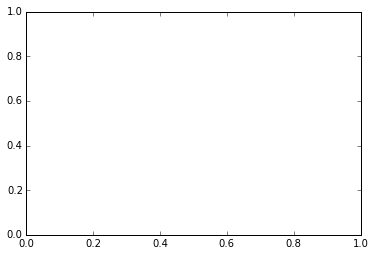

In [24]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [25]:
mu = 0.6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

In [26]:
%matplotlib inline
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)


In [15]:
rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [27]:
rv

In [28]:
 rv.plot()

AttributeError: 'rv_frozen' object has no attribute 'plot'

In [29]:
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')

In [30]:
from scipy.stats import poisson, lognorm
myMu=10
p = poisson(myMu)

In [38]:
sp =p.rvs((100,))

In [39]:
sp

array([ 7,  6, 13, 10,  5, 16,  7, 15, 15, 10, 11,  7, 16, 14,  9, 13, 11,
        8,  9, 13,  6, 11, 10,  6,  9, 10,  4, 13,  9, 12, 10,  9,  8,  9,
       12, 12, 10,  8,  7,  7, 10, 11,  8,  9,  6, 10, 10, 14, 10,  8, 11,
        9,  6, 11, 13, 10,  8, 10,  6, 10, 12,  5,  9,  6, 10,  7, 12, 13,
       10, 10, 10,  8,  7,  7, 14,  5,  7,  4, 12,  3, 10,  7, 10, 18, 12,
        9,  9, 13, 11,  6,  8,  8, 13, 13,  5,  8,  3, 13, 14, 11])

In [37]:
sp

array([15, 14,  8,  5, 13,  7, 13,  7,  6, 11,  8,  7,  8, 14, 14,  9,  7,
        8,  7, 13, 15,  8, 14,  6,  9, 10,  9,  8,  9, 15, 13,  8,  8, 15,
       12, 11, 13, 10, 13,  9,  8, 14,  5, 10, 10, 16,  7, 11, 12, 11,  8,
       10,  8, 10,  8,  9,  9,  9, 11,  9,  7, 10, 17, 10,  6,  9,  8, 12,
        8,  3, 12,  6,  8, 10, 17,  9, 14, 10, 13, 12, 13,  8, 11, 12, 10,
        7,  9, 11, 10,  8, 12,  9, 13,  7, 11,  7,  8, 12, 17,  9])

In [40]:
from scipy import stats

In [41]:
import scipy as sp
import numpy as np

In [42]:
import matplotlib as mpl
from matplotlib import pyplot as plt

In [43]:
s = sp.randn(100)

In [44]:
s

array([-0.09333588, -2.07023758, -0.19871955,  1.244719  , -0.74428519,
        0.4238768 , -0.54121639,  0.93755919, -0.0105421 , -1.14109916,
       -0.96701548, -0.91865979, -0.54439714, -1.97370875, -0.9401743 ,
       -1.92506459,  0.13772794,  0.20674345, -0.65227671, -0.9459022 ,
       -0.92682062, -0.5470274 ,  1.45642977,  0.99689984, -1.43999348,
        1.14412799, -0.23297605, -0.68558519,  1.01392147, -0.0360757 ,
       -1.91344065,  0.58491056,  0.18122512, -1.55109703,  0.46661451,
        0.17773384, -0.1764971 ,  0.93886098,  0.21559292,  0.75818508,
       -0.05506126,  0.50660472,  1.57047071, -0.64151355,  1.5038446 ,
       -0.89497971,  0.05422868, -0.76515547, -0.03478095, -0.48247908,
        0.10494945, -1.03869943, -1.70368393, -0.65847926, -0.76988737,
       -0.67155096, -0.0819699 , -1.15099347, -0.1585604 , -0.04903008,
       -0.46168861,  0.93676134,  0.24782015,  0.64895878, -1.03674236,
        0.01321058,  0.97077801,  1.13776811,  1.09518361, -0.11

In [50]:
n = stats.norm.rvs(loc=3.5, scale=102.0, size=1000)

In [51]:
n

array([ -6.29273219e+01,   1.87534927e+01,  -1.91309376e+02,
        -9.73843476e+01,  -1.74642131e+02,   1.78185787e+02,
         6.10507226e+01,  -1.22779888e+02,  -5.90767401e+01,
        -1.22058955e+02,  -5.53820981e+01,   3.55719463e+01,
        -8.42854627e+01,  -1.01193344e+02,   7.81212457e+01,
         1.03788879e+02,  -2.60545505e+01,  -1.11143040e+02,
        -1.04339565e+02,  -6.76240399e+01,   4.90930648e+01,
         8.09871997e+01,   1.02764586e+02,   1.45544520e+01,
        -2.28551817e+01,   5.57074140e+01,  -2.11565753e+02,
         7.09545729e+01,  -5.36121664e+01,   8.88688983e+01,
         1.07089967e+01,  -8.22717207e+01,   4.45670452e+01,
        -9.73762223e+01,   3.21606245e+02,   5.41448067e+01,
         6.42696477e+01,  -1.59643620e+02,  -1.39570833e+02,
        -3.48514254e+01,   7.18341650e+01,   1.81167747e+01,
        -2.25124145e+00,  -2.23805360e+01,   1.18815494e+02,
         7.72687679e+01,   3.07318336e+02,  -9.79713652e+01,
        -7.03174385e+01,

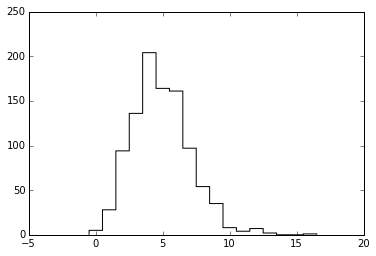

In [64]:
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
from scipy import interpolate

def simulate_poisson(mu,  simulations):


    # Draw random samples from the Poisson distribution, to simulate
    # the observed events per 2 second interval.
    counts = stats.poisson.rvs(mu, size=simulations)

    # Bins for the histogram: only the last bin is closed on both
    # sides. We need one more bin than the maximum value of count, so
    # that the maximum value goes in its own bin instead of getting
    # added to the previous bin.
    # [0,1), [1, 2), ..., [max(counts), max(counts)+1]
    bins = range(0, max(counts)+2)

    # Plot histogram.
    plt.hist(counts, bins=bins, align="left", histtype="step", color="black")
    

simulate_poisson(5, 1000)

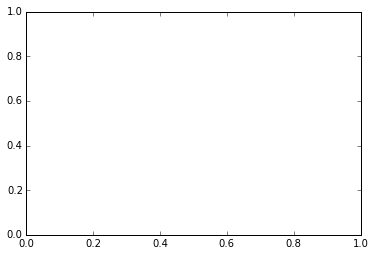

In [65]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [66]:
s = 0.953682269606
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

In [67]:
x = np.linspace(lognorm.ppf(0.01, s),
              lognorm.ppf(0.99, s), 100)
ax.plot(x, lognorm.pdf(x, s),
         'r-', lw=5, alpha=0.6, label='lognorm pdf')

In [68]:
stats.lognorm.rvs(.999,s, loc=0,scale=!)

SyntaxError: invalid syntax (<ipython-input-68-7d48a1a14daa>, line 1)

In [82]:
stats.lognorm.interval(0.95,10, loc=0)

(3.0759875111653657e-09, 325098849.18913114)

In [83]:
# lognorm(mu=10,sigma=3)
# so shape=3, loc=0, scale=np.exp(10) ?
x=np.linspace(0.01,20,200)
sample_dist = sp.stats.lognorm.pdf(x, 3, loc=0, scale=np.exp(10))
shape, loc, scale = sp.stats.lognorm.fit(sample_dist, floc=0)
print shape, loc, scale
print np.log(scale), shape # mu and sigma
# last line: -7.63285693379 0.140259699945  # not 10 and 3

0.140259699945 0 0.000484275337537
-7.63285693379 0.140259699945


(0.49826684207144645, 0.03403632306285781, 0.97305473523290575)


/Users/x/anaconda/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2711: RuntimeWarning: divide by zero encountered in log
  return -log(x)**2 / (2*s**2) + np.where(x == 0, 0, -log(s*x*sqrt(2*pi)))


(array([ 0.12672991,  0.49539875,  0.88710939,  0.93607322,  0.86118736,
         0.59620663,  0.49251852,  0.39459086,  0.28226208,  0.16705307,
         0.17569374,  0.09792766,  0.07776608,  0.04320338,  0.0345627 ,
         0.02592203,  0.01440113,  0.00864068,  0.00864068,  0.00576045,
         0.00288023,  0.00288023,  0.00288023,  0.00288023,  0.00288023,
         0.        ,  0.00288023,  0.00576045,  0.        ,  0.00576045]),
 array([ 0.2196336 ,  0.39323113,  0.56682866,  0.7404262 ,  0.91402373,
         1.08762126,  1.26121879,  1.43481632,  1.60841386,  1.78201139,
         1.95560892,  2.12920645,  2.30280399,  2.47640152,  2.64999905,
         2.82359658,  2.99719411,  3.17079165,  3.34438918,  3.51798671,
         3.69158424,  3.86518177,  4.03877931,  4.21237684,  4.38597437,
         4.5595719 ,  4.73316943,  4.90676697,  5.0803645 ,  5.25396203,
         5.42755956]),
 <a list of 30 Patch objects>)

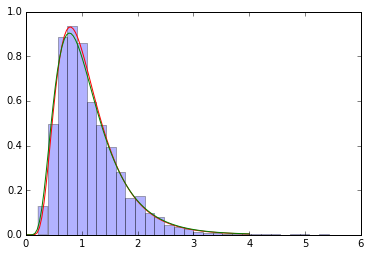

In [84]:
samp=sp.stats.lognorm(0.5,loc=0,scale=1).rvs(size=2000) # sample
param=sp.stats.lognorm.fit(samp) # fit the sample data
print param # does not coincide  with shape, loc, scale above!
x=np.linspace(0,4,100)
pdf_fitted = sp.stats.lognorm.pdf(x, param[0], loc=param[1], scale=param[2]) # fitted distribution
pdf = sp.stats.lognorm.pdf(x, 0.5, loc=0, scale=1) # original distribution
plt.plot(x,pdf_fitted,'r-',x,pdf,'g-')
plt.hist(samp,bins=30,normed=True,alpha=.3)

(array([  2.18171467e-69,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.09140303e-72]),
 array([  5.15308303e-73,   4.58125902e+68,   9.16251805e+68,
          1.37437771e+69,   1.83250361e+69,   2.29062951e+69,
          2.74875541e+69,   3.20688132e+69,   3.66500722e+69,
          4.12313312e+69,   4.58125902e+69,   5.03938493e+69,
          5.49751083e+69,   5.95563673e+69,   6.41376263e+69,
          6.87188854e+69,   7.33001444e+69,   7.78814034e+69,
      

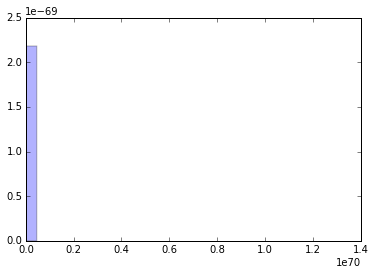

In [92]:
samp=sp.stats.lognorm(50,loc=0,scale=10).rvs(size=2000) # sample

plt.hist(samp,bins=30,normed=True,alpha=.3)

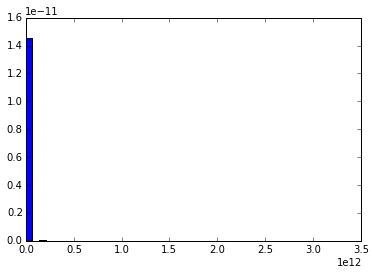

In [114]:
mu, sigma = 1, 10 # mean and standard deviation
s = np.random.normal(0, 1, 1000)
x = np.exp(s*sigma+mu)
plt.hist(x, 50, normed=True)
plt.show()

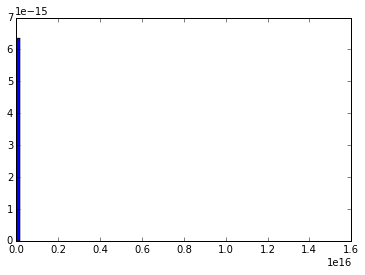

/Users/x/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/Users/x/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/Users/x/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in multiply


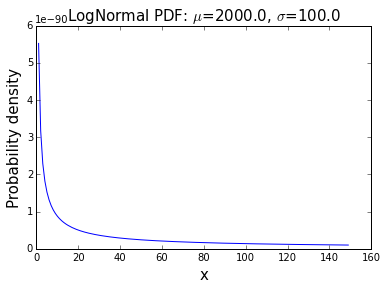

In [130]:
u=2000 # mean
s=100 # standard deviation
x=np.arange(0,150,1)
y=(1/(x*s* (np.sqrt(2*np.pi))))*np.exp(-(((np.log (x)-u)**2)/(2*s*s)))
#y=(1/(np.sqrt(2*np.pi*s*s)))*np.exp(-(((x-u)**2)/(2*s*s)))
plt.plot(x,y,'-')
plt.title('LogNormal PDF: $\mu$=%.1f, $\sigma$=%.1f' % (u,s),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()

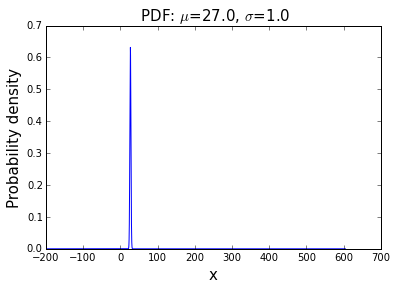

In [139]:
u=27 # mean
s=1 # standard deviation
x=np.arange(-200,605,0.1)
y=(1/(np.sqrt(2*np.pi*s*s)))*np.exp(-(((x-u)**2)/(2*s*s)))
plt.plot(x,np.sqrt(y),'-')
plt.title(' PDF: $\mu$=%.1f, $\sigma$=%.1f' % (u,s),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()

In [7]:
%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs

In [2]:
np.random.seed(12345)


(array([  1.36155601e-04,   1.36155601e-04,   2.72311201e-04,
          4.08466802e-04,   5.44622402e-04,   5.44622402e-04,
          9.53089204e-04,   1.40240269e-02,   6.35710499e-01,
          4.07105246e-02,   7.89702483e-03,   8.16933603e-03,
          9.66704764e-03,   1.47048049e-02,   1.75640725e-02,
          1.81086949e-02,   2.38272301e-02,   2.50526305e-02,
          3.02265433e-02,   3.52643005e-02,   3.88043462e-02,
          3.77151014e-02,   3.82597238e-02,   4.12551470e-02,
          4.12551470e-02,   3.77151014e-02,   3.55366118e-02,
          3.54004562e-02,   3.19965661e-02,   2.83203649e-02,
          2.20572073e-02,   1.91979397e-02,   1.74279169e-02,
          1.42963381e-02,   8.03318043e-03,   8.98626964e-03,
          6.80778003e-03,   3.26773441e-03,   4.22082362e-03,
          2.04233401e-03,   1.90617841e-03,   1.08924480e-03,
          2.72311201e-04,   6.80778003e-04,   4.08466802e-04,
          4.08466802e-04,   1.36155601e-04,   0.00000000e+00,
        

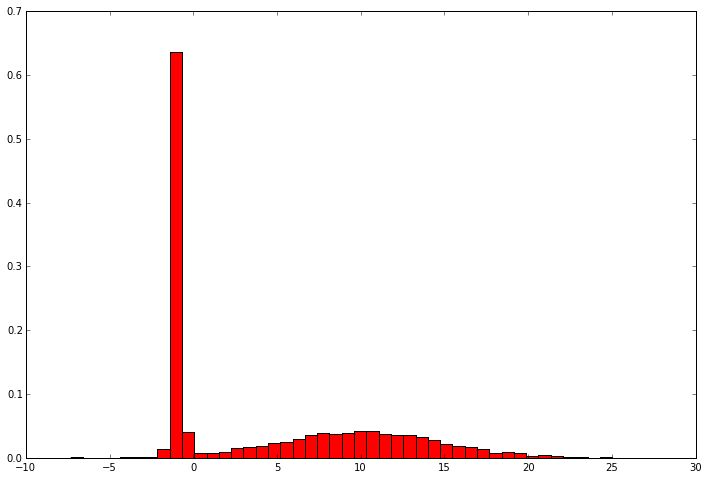

In [21]:
obs_dist1 = mixture_rvs([.5,.5], size=10000, dist=[stats.norm, stats.norm],
                kwargs = (dict(loc=-1,scale=.2),dict(loc=10,scale=5)))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(obs_dist1, bins=50, normed=True, color='red')

In [13]:
kde = sm.nonparametric.KDEUnivariate(obs_dist1)
kde.fit()

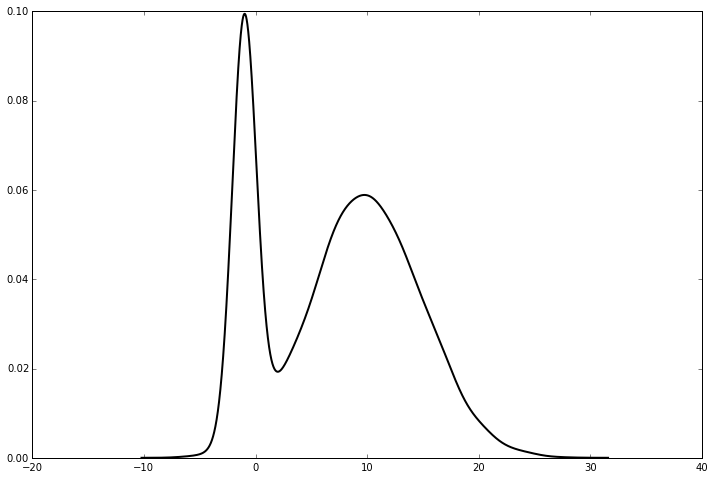

In [15]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(kde.support, kde.density, lw=2, color='black')

(array([ 0.01340802,  0.01340802,  0.        ,  0.01340802,  0.02681605,
         0.01340802,  0.05363209,  0.06704011,  0.20112034,  0.18771232,
         0.33520057,  0.50950487,  0.67040114,  0.53632091,  1.01900973,
         1.24694612,  1.30057821,  1.8234911 ,  2.2391398 ,  2.73523665,
         2.90954094,  3.62016615,  3.82128649,  4.02240683,  3.91514265,
         3.68720626,  4.2369352 ,  3.63357417,  3.68720626,  3.21792547,
         3.44586185,  2.68160456,  2.17209969,  2.13187562,  1.59555471,
         1.16649798,  1.04582578,  0.80448137,  0.63017707,  0.41564871,
         0.2949765 ,  0.2949765 ,  0.24134441,  0.20112034,  0.04022407,
         0.04022407,  0.05363209,  0.        ,  0.01340802,  0.01340802]),
 array([ 0.61834125,  0.63325769,  0.64817413,  0.66309057,  0.67800702,
         0.69292346,  0.7078399 ,  0.72275634,  0.73767279,  0.75258923,
         0.76750567,  0.78242211,  0.79733855,  0.812255  ,  0.82717144,
         0.84208788,  0.85700432,  0.87192077,  0

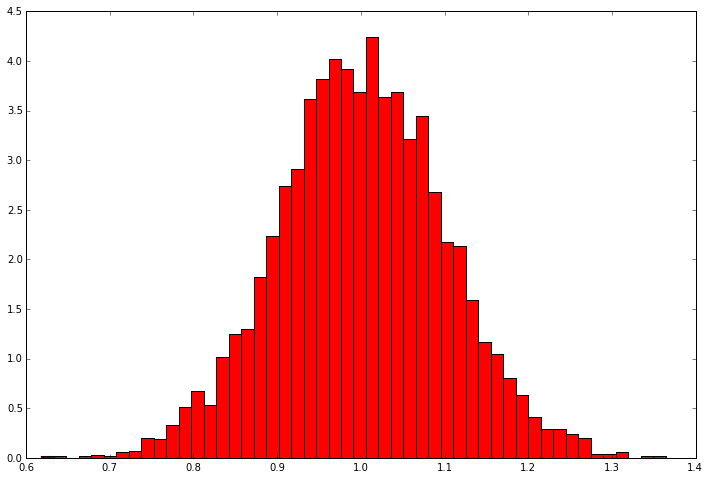

In [49]:
obs_dist1 = stats.norm(loc=1,scale=.1)

obs_dist1=obs_dist1.rvs(5000)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(obs_dist1, bins=50, normed=True, color='red')


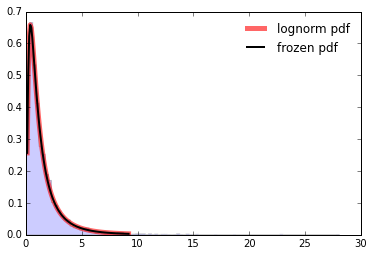

In [56]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
s = 0.953682269606
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')
x = np.linspace(lognorm.ppf(0.01, s),
              lognorm.ppf(0.99, s), 100)
ax.plot(x, lognorm.pdf(x, s),
         'r-', lw=5, alpha=0.6, label='lognorm pdf')
rv = lognorm(s)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = lognorm.ppf([0.001, 0.5, 0.999], s)
np.allclose([0.001, 0.5, 0.999], lognorm.cdf(vals, s))
r = lognorm.rvs(s, size=5000)
ax.hist(r,  bins=100,normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

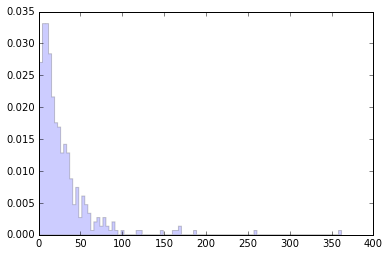

27.738373614309079

In [95]:
fig, ax = plt.subplots(1, 1)
r = lognorm.rvs(s, loc=0.1,scale=18, size=410)
ax.hist(r,  bins=100,normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
r.mean()

In [93]:
print r.mean()
print r.max()
print r.std()
print r.sum()

29.5535219075
474.469796961
39.6328129921
12116.9439821


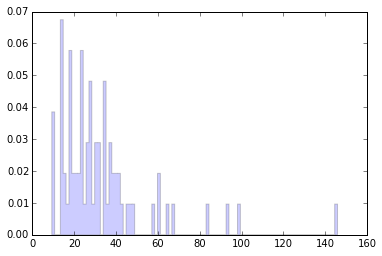

32.8688422614
145.857258421
22.1552786202
2498.03201187


In [97]:
fig, ax = plt.subplots(1, 1)
r = lognorm.rvs(s, loc=7,scale=20, size=76)
ax.hist(r,  bins=100,normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
print r.mean()
print r.max()
print r.std()
print r.sum()

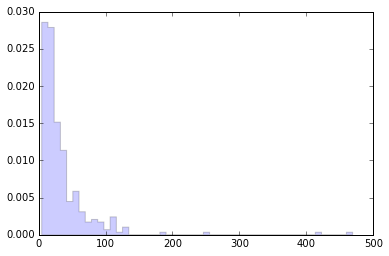

35.0856476883
469.003128988
44.5598707542
10981.8077265


In [166]:
#payment	avg	max	min	std	amount
#313	32.21	199.00	3.0	25.875962	10081.73	
fig, ax = plt.subplots(1, 1)
r = lognorm.rvs(s, loc=3,scale=20, size=313)
ax.hist(r,  bins=50,normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
print r.mean()
print r.max()
print r.std()
print r.sum()

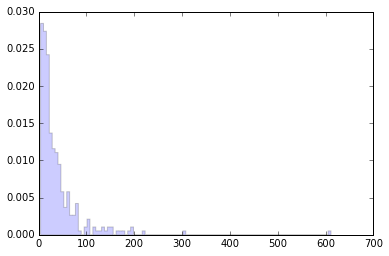

39.2912661949
611.351103218
51.5072279529
12298.166319


In [116]:
#payment	avg	max	min	std	amount
#313	32.21	199.00	3.0	25.875962	10081.73	
fig, ax = plt.subplots(1, 1)
r = lognorm.rvs(s, loc=3,scale=20, size=313)
ax.hist(r,  bins=100,normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
print r.mean()
print r.max()
print r.std()
print r.sum()

In [123]:
from IPython.display import Image
Image(url='./mu_sigma.png')

In [157]:
import math
avg=32.21
std=25.875962
var=std*std
sigma2=np.log(1+(var/(avg*avg)))
sigma =np.sqrt(sigma2)
mu = np.log(avg)-(.5*var) 
print mu, sigma, var

-331.310427749 0.705668335305 669.565409425


In [156]:

emu=np.exp(mu)
esigma=np.exp(sigma)

-331.310427749 0.705668335305


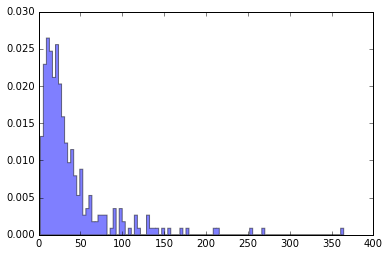

37.9564228975 364.527601283 2.08767031699 42.9880487573 11880.3603669


In [162]:
#payment	avg	max	min	std	amount
#313	32.21	199.00	3.0	25.875962	10081.73	
fig, ax = plt.subplots(1, 1)
r = lognorm.rvs(s, loc=4,scale=std, size=313)
ax.hist(r,  bins=100,normed=True, histtype='stepfilled', alpha=0.5)
ax.legend(loc='best', frameon=False)
plt.show()
print r.mean(),r.max(),r.min(), r.std(), r.sum()
